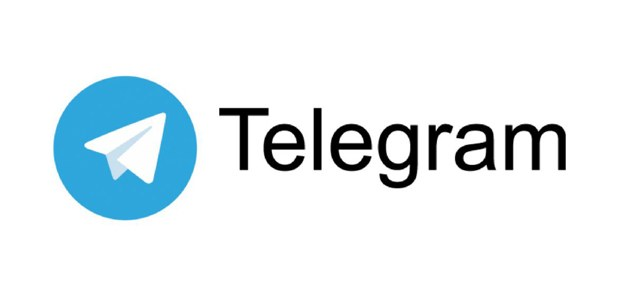

#**Pipeline de Dados do Telegram**

Autor: Denes Miranda

## Tópico
*   Contexto
*   Telegram
*   Bot API
*   Dados
*   Ingestão
*   ETL
*   Apresentação
*   Conclusão

## 1\. Contexto

> Este trabalho contempla a criação de um pipeline de dados baseado em nuvem. Foi construindo para receber, processar e armazenar mensagens de texto provenientes de um grupo específico no aplicativo de mensagens Telegram. Um bot foi adicionado ao grupo, criado dentro da própria plataforma, com o objetivo de coletar as mensagens e enviá-las via API para a infraestrutura em nuvem da Amazon Web Services (AWS), para os dados serem processados, armazenados, tratados e analisados.

## 1.1\. ChatBot

>São programas que simulam conversas humanas em aplicativos de mensagens ou sites. Eles automatizam tarefas de atendimento ao cliente, permitindo melhorias no serviço. Ao capturar mensagens, as empresas podem avaliar o fluxo de comunicação, identificar períodos de maior atividade do chatbot e analisar a frequência dos assuntos abordados nos atendimentos automatizados.


## 1.2\. Telegram

Telegram é uma plataforma de mensagens instantâneas freeware (distribuído gratuitamente). É muito popular entre desenvolvedores por ser pioneiro na implantação da funcionalidade de criação de chatbots, que, por sua vez, permitem a criação de diversas automações.

## 1.3\. Pipeline de Dados

Um pipeline de dados é um conjunto de processos e tecnologias usadas para mover e transformar dados de uma origem para um destino de forma automatizada e eficiente. Ele pode incluir etapas como ingestão de dados (coleta), transformação de dados (limpeza, agregação, enriquecimento) e carga de dados (armazenamento em um banco de dados ou data warehouse). O pipeline de dados é essencial para garantir que os dados sejam processados de maneira confiável e estejam prontos para análises ou outros fins.

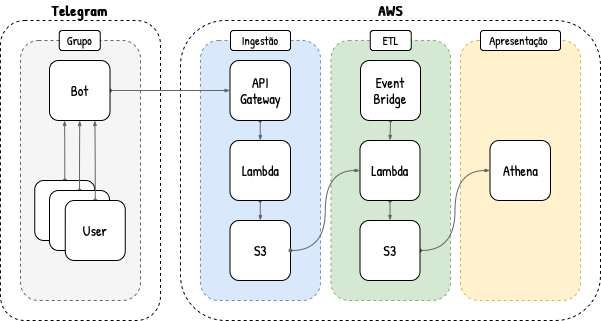

>No cenário descrito, o Telegram é utilizado como a fonte de dados transacionais. As mensagens enviadas por usuários em um grupo são capturadas por um bot e encaminhadas por meio de um webhook do backend do aplicativo para um endpoint exposto pelo AWS API Gateway. As mensagens são transportadas no corpo (payload) das requisições HTTP.

## 2\. Telegram

Criação do ChatBot, Grupo, configurações e envio de mensagens

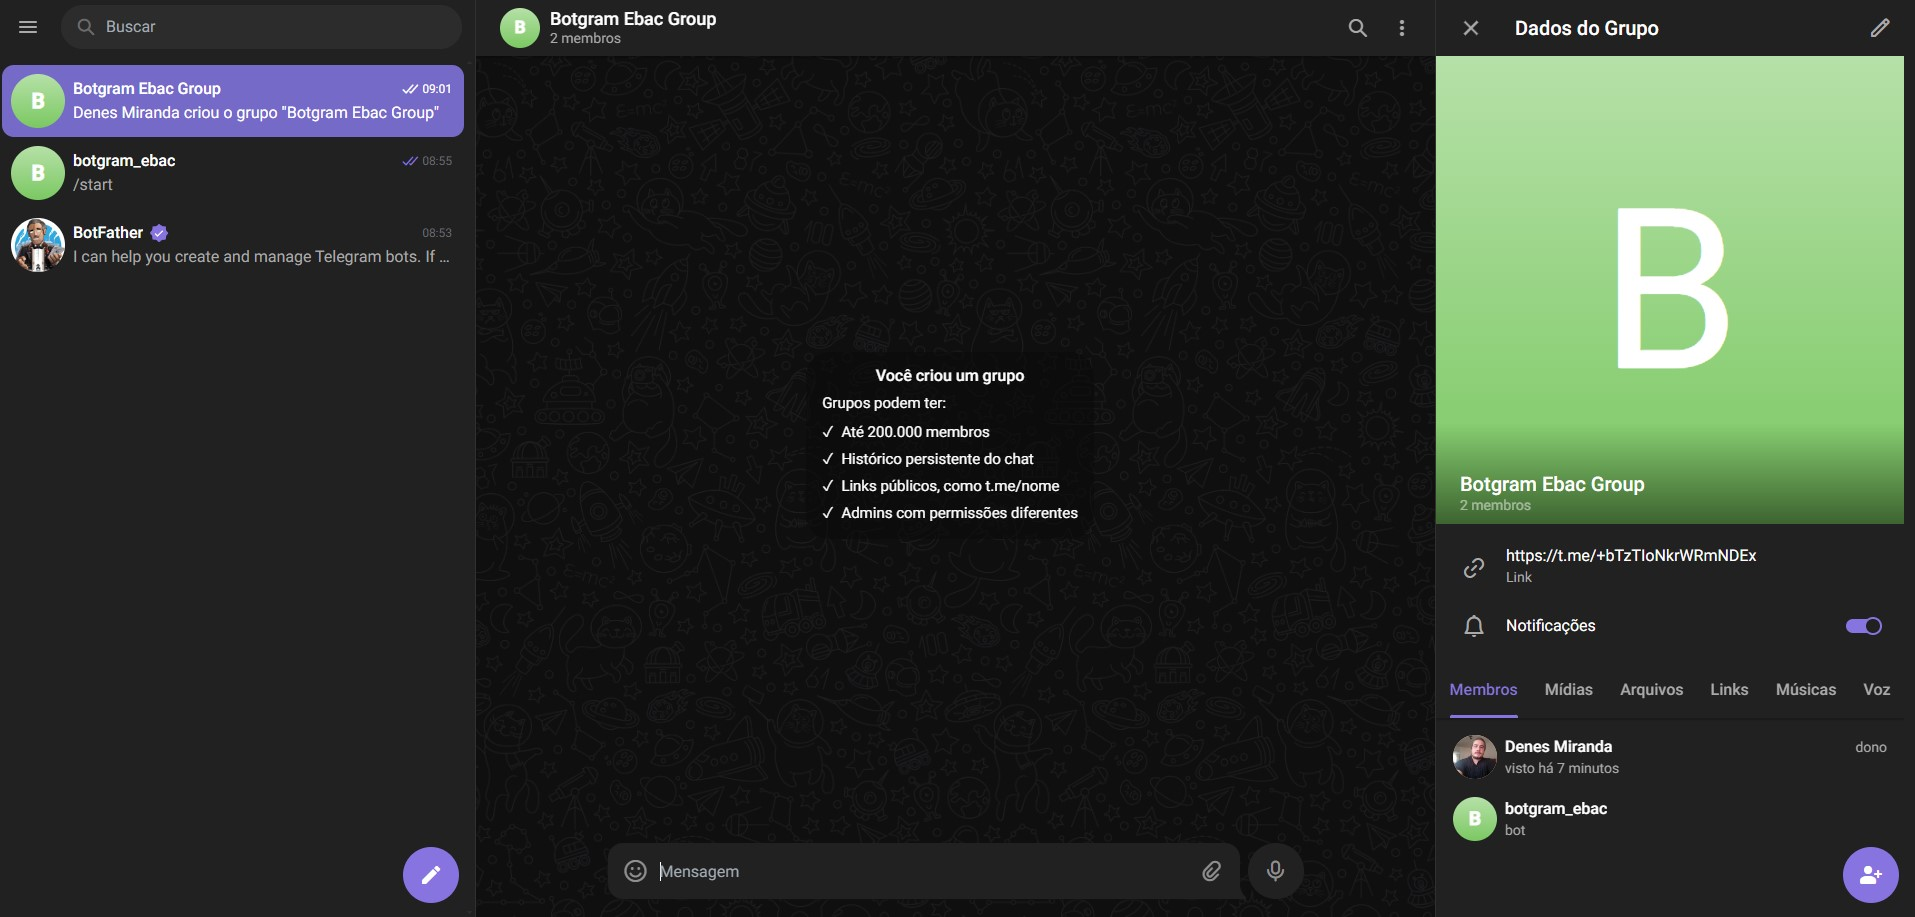

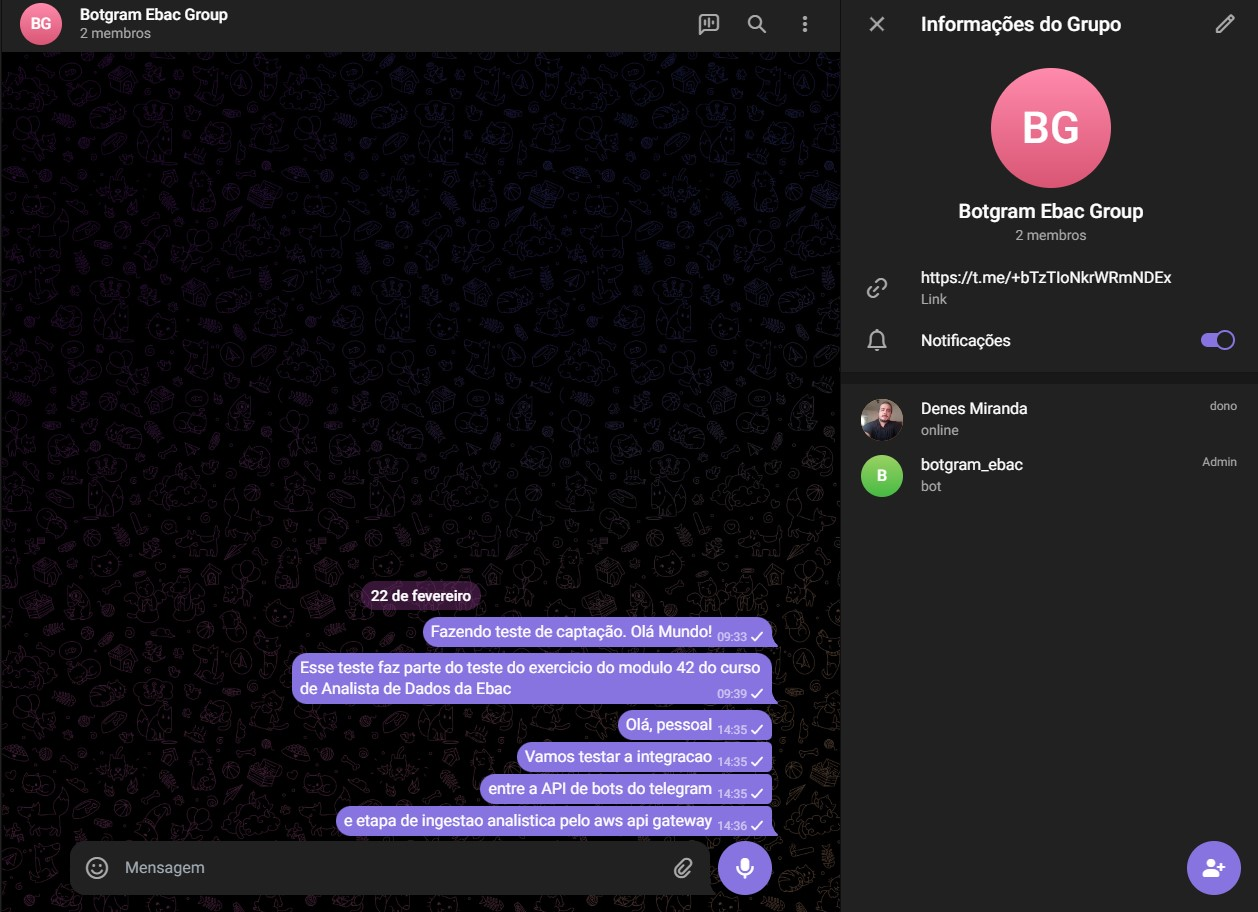

## 3\. Bot API

>Para acessar mensagens captadas por um bot via API, é necessário o token de acesso fornecido pelo BotFather na criação do bot. O acesso é feito através do pacote getpass em Python para ingerir o token de forma segura, sem expô-lo no Google Colab.

In [48]:
#Importando bibliotecas
from getpass import getpass
import json
import requests

In [57]:
#Injetando o token
token = getpass()

··········


In [58]:
#A url base é comum a todos os métodos da API.
base_url = f'https://api.telegram.org/bot{token}'

In [54]:
#Desativando o webhook antes de usar o método getUpdates
#base_url = f'https://api.telegram.org/bot{token}/deleteWebhook'
#response = requests.post(base_url)

In [59]:
#O método getMe retorna informações sobre o bot.
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7109647156:AAFgWuezHy8I3FfwBoIoCb87VfgBhdQmKow/getMe
{
  "ok": true,
  "result": {
    "id": 7109647156,
    "is_bot": true,
    "first_name": "botgram_ebac",
    "username": "botgram_ebac_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false
  }
}


In [61]:
#O método getUpdates retorna as mensagens captadas pelo bot.
response = requests.get(url=f'{base_url}/getUpdates')
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 76202967,
      "message": {
        "message_id": 10,
        "from": {
          "id": 6620146100,
          "is_bot": false,
          "first_name": "Denes",
          "last_name": "Miranda",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002131719442,
          "title": "Botgram Ebac Group",
          "type": "supergroup"
        },
        "date": 1708718449,
        "text": "Fazendo teste de capta\u00e7\u00e3o. Ol\u00e1 Mundo!"
      }
    },
    {
      "update_id": 76202968,
      "message": {
        "message_id": 11,
        "from": {
          "id": 6620146100,
          "is_bot": false,
          "first_name": "Denes",
          "last_name": "Miranda",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002131719442,
          "title": "Botgram Ebac Group",
          "type": "supergroup"
        },
        "date": 1708719252,
        "forward_origin": {
  

O retorno é um jason. O json.loads é uma função em Python que converte uma string JSON em um objeto Python.

## 4\. Dados

No projeto, as mensagens recuperadas via API são dados semi-estruturados em formato JSON, com chaves mandatórias e diversas chaves opcionais. Para mensagens de texto, é necessário ingerir as chaves obrigatórias e a chave "text". O processo envolve a conversão da string JSON em um objeto Python e a extração das chaves desejadas, como "id", "timestamp", "sender_id" e "text", para manipulação e armazenamento dos dados da mensagem.Replique as atividades da aula 1.

## 4.1\. Mensagem

In [70]:
#Criando arquivo
%%writefile telegram.json
{
    "update_id": 76202967,
    "message": {
        "message_id": 10,
        "from": {
            "id": 6620146100,
            "is_bot": false,
            "first_name": "Denes"
        },
        "chat": {
            "id": -1002131719442,
            "type": "supergroup"
        },
        "date": 1708718449,
        "text": "Fazendo teste de captação. Olá Mundo!"
    }
}

Overwriting telegram.json


## 4.2\. Wrangling

Vamos denormalizar o conteúdo da mensagem semi-estruturado no formato JSON utilizando apenas Python nativo, ou seja, sem o auxílio de pacotes, como Pandas.

In [77]:
#Fazendo a leitura do arquivo
import json

with open('telegram.json', mode='r', encoding='utf8') as fp:
  data = json.load(fp)
  data = data["message"]

In [78]:
#Saída do arquivo
print(json.dumps(data, indent=2))

{
  "message_id": 10,
  "from": {
    "id": 6620146100,
    "is_bot": false,
    "first_name": "Denes"
  },
  "chat": {
    "id": -1002131719442,
    "type": "supergroup"
  },
  "date": 1708718449,
  "text": "Fazendo teste de capta\u00e7\u00e3o. Ol\u00e1 Mundo!"
}


No código fornecido, um arquivo JSON contendo mensagens é carregado e processado. Um laço de repetição é usado para percorrer todas as mensagens no arquivo. Para cada mensagem, verifica-se se a chave "text" está presente. Se não estiver, essa chave é adicionada com o valor None. Além disso, duas novas chaves, "context_date" e "context_timestamp", são adicionadas a cada mensagem, contendo a data e hora atuais do processamento. Ao final, as mensagens processadas são exibidas.

In [79]:
from datetime import datetime

date = datetime.now().strftime('%Y-%m-%d')
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

parsed_data = dict()

for key, value in data.items():

    if key == 'from':
        for k, v in data[key].items():
            if k in ['id', 'is_bot', 'first_name']:
              parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

    elif key == 'chat':
        for k, v in data[key].items():
            if k in ['id', 'type']:
              parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

    elif key in ['message_id', 'date', 'text']:
        parsed_data[key] = [value]

if not 'text' in parsed_data.keys():
  parsed_data['text'] = [None]

parsed_data['context_date'] = [date]
parsed_data['context_timestamp'] = [timestamp]

In [80]:
for k, v in parsed_data.items():
  print(f"{k}: {v}")

message_id: [10]
user_id: [6620146100]
user_is_bot: [False]
user_first_name: ['Denes']
chat_id: [-1002131719442]
chat_type: ['supergroup']
date: [1708718449]
text: ['Fazendo teste de captação. Olá Mundo!']
context_date: ['2024-02-23']
context_timestamp: ['2024-02-23 21:51:20']


Ppacote Python PyArrow para criar uma tabela com os dados processado que, posteriormente, pode ser facilmente persistida em um arquivo no formato Apache Parquet.

In [81]:
import pyarrow as pa

table = pa.Table.from_pydict(mapping=parsed_data)

In [82]:
table

pyarrow.Table
message_id: int64
user_id: int64
user_is_bot: bool
user_first_name: string
chat_id: int64
chat_type: string
date: int64
text: string
context_date: string
context_timestamp: string
----
message_id: [[10]]
user_id: [[6620146100]]
user_is_bot: [[false]]
user_first_name: [["Denes"]]
chat_id: [[-1002131719442]]
chat_type: [["supergroup"]]
date: [[1708718449]]
text: [["Fazendo teste de captação. Olá Mundo!"]]
context_date: [["2024-02-23"]]
context_timestamp: [["2024-02-23 21:51:20"]]

## 5\. Ingestão

Os dados transacionais são recebidos e persistidos em ambientes analíticos. O objetivo é preservar o formato mais próximo possível do original, sem realizar transformações significativas no conteúdo ou na estrutura (schema) dos dados. <br>

Neste trabalho as mensagens capturadas pelo bot do Telegram são fornecidas no formato JSON e podem ser ingeridas por meio da API web de bots do Telegram. Como o Telegram retém as mensagens por apenas 24 horas em seus servidores, a ingestão via streaming é a mais indicada para garantir a captura em tempo real dessas mensagens. Para viabilizar essa ingestão, será utilizado um webhook para redirecionar automaticamente as mensagens para outra API web. <br>

Sendo assim, precisamos de um serviço da AWS que forneça um API web para receber os dados direcionados, o AWS API Gateway. Dentre suas diversas funcionalidades, o AWS API Gateway permite o direcionamento do dado recebido para outros serviços da AWS. Logo, vamos conectá-lo ao AWS Lambda, que por sua vez, irá armazenar o dado em seu formato original (JSON) em um Bucket do AWS S3.

Para realizar essas etapas será desenvolvido:

 - Um *bucket* no `AWS S3`;
 - Função no `AWS Lambda`;
 - API *web* no `AWS API Gateway`;
 - Configurar o *webhook* da API de *bots* do **Telegram**.

## 5.1\. Amazon S3

O AWS S3 tem a função de passivamente armazenar as mensagens captadas pelo bot do Telegram no seu formato original: JSON. O repositorio tera a função de datalake tendo em vista que o armazenamento sera de dados brutos(cru). <br>

**bucket criado:** botgram-ebac-datalake-raw

## 5.2\. AWS Lambda

O `AWS Lambda` tem a função de ativamente persistir as mensagens captadas pelo *bot* do **Telegram** em um *bucket* do `AWS S3`. <br>


 - Recebe a mensagem no parâmetro `event`;
 - Verifica se a mensagem tem origem no grupo do **Telegram** correto;
 - Persiste a mensagem no formato JSON no *bucket* do `AWS S3`;
 - Retorna uma mensagem de sucesso (código de retorno HTTP igual a 200) a API de *bots* do **Telegram**.

Para que a função funcione corretamente, algumas configurações precisam ser realizadas.<br>

- **Variáveis de ambiente:** configuração das variáveis de ambiente: AWS_S3_BUCKET com o nome do bucket do AWS S3 e TELEGRAM_CHAT_ID com o id do chat do grupo do Telegram.

- **Premissão através do IAM:** permissão de escrita no bucket do AWS S3 para a função do AWS Lambda no AWS IAM.

In [ ]:
#Função para captação das mensagens no grupo do Telegram
import os
import json
import logging
from datetime import datetime, timezone, timedelta

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    #message = event
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

**Teste da função Lambda**

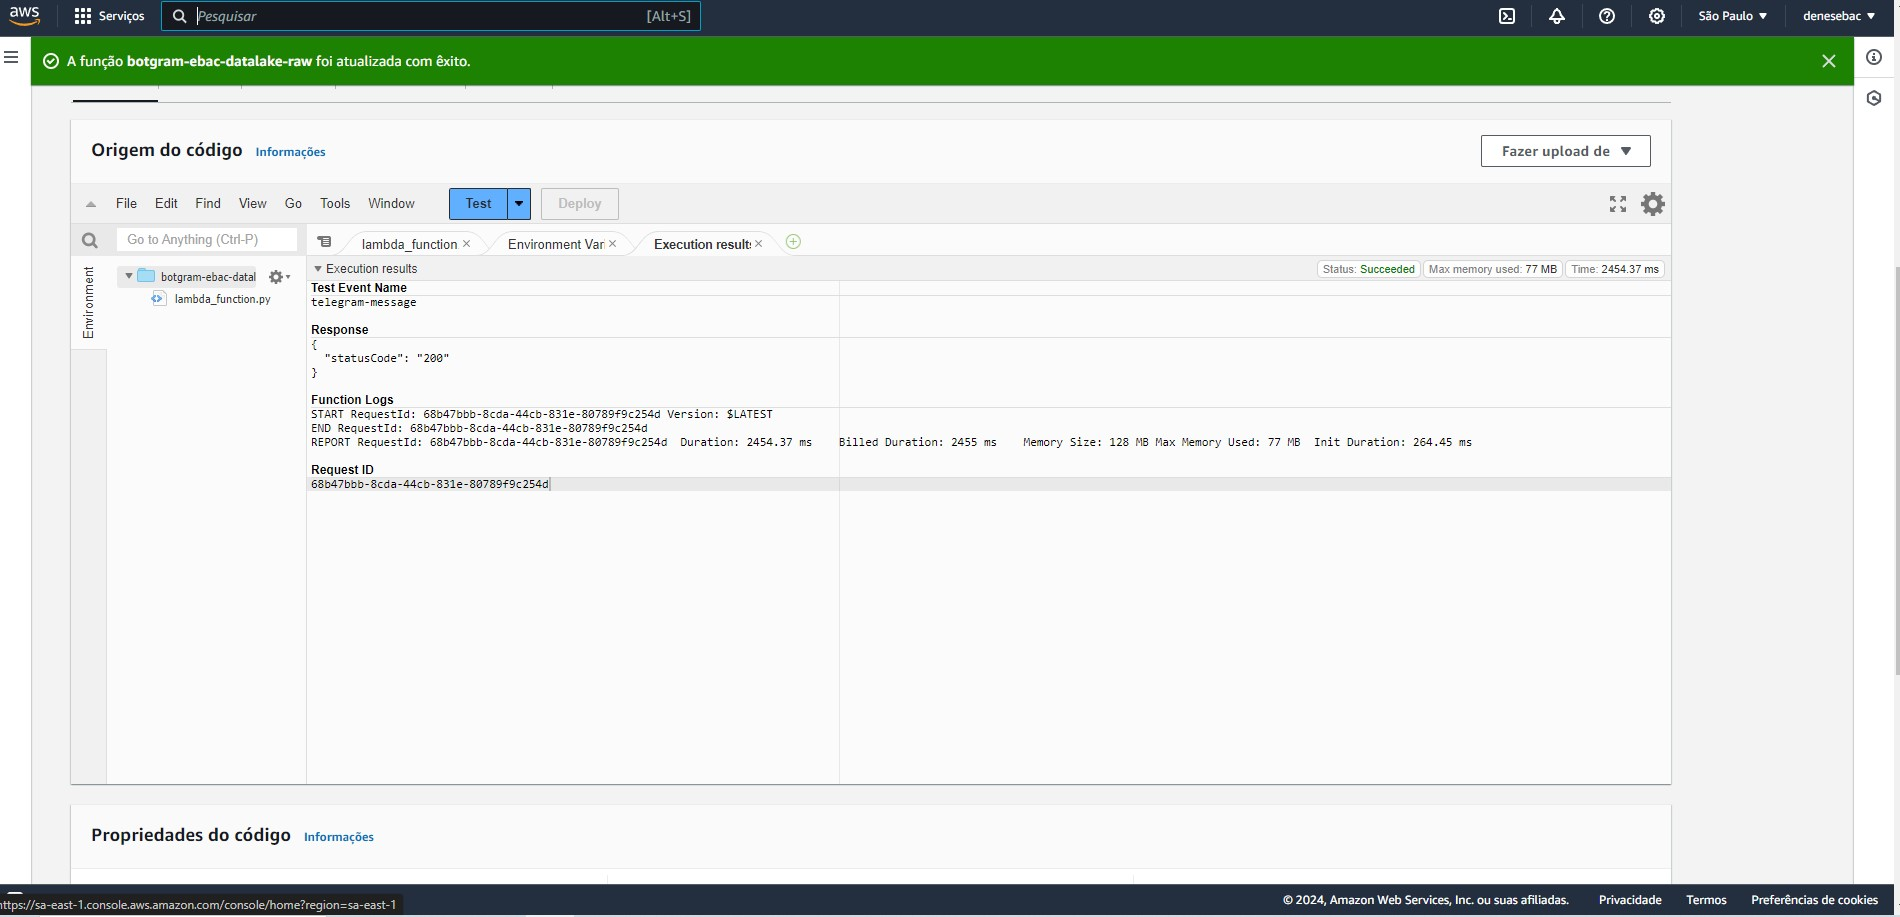

**Resutado do teste - arquivo .json contendo as mensagens captadas e armazenadas no bucket**

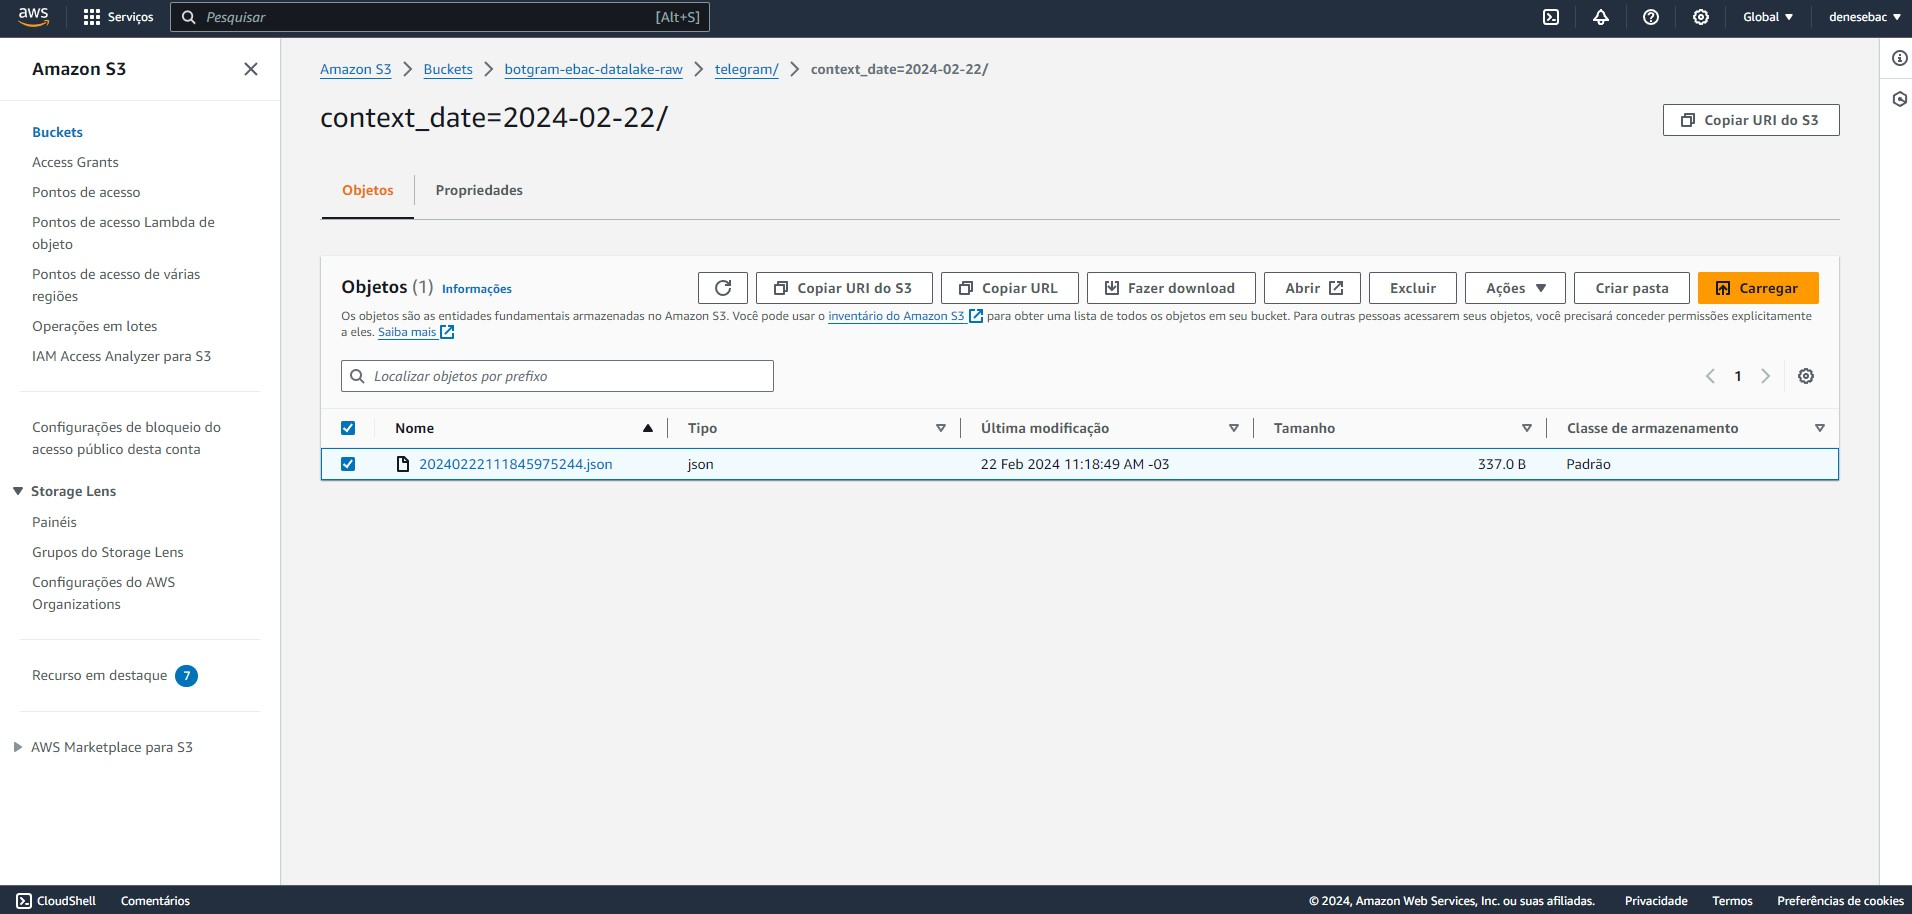

## 5.3\. AWS API Gateway

o AWS API Gateway tem a função de receber as mensagens captadas pelo bot do Telegram, enviadas via webhook, e iniciar uma função do AWS Lambda, passando o conteúdo da mensagem no seu parâmetro event.

Criação da API no `AWS API Gateway` que conecta com a função do `AWS Lambda` pelo metodo POST.<br>

**API: botgram-ebac-api**

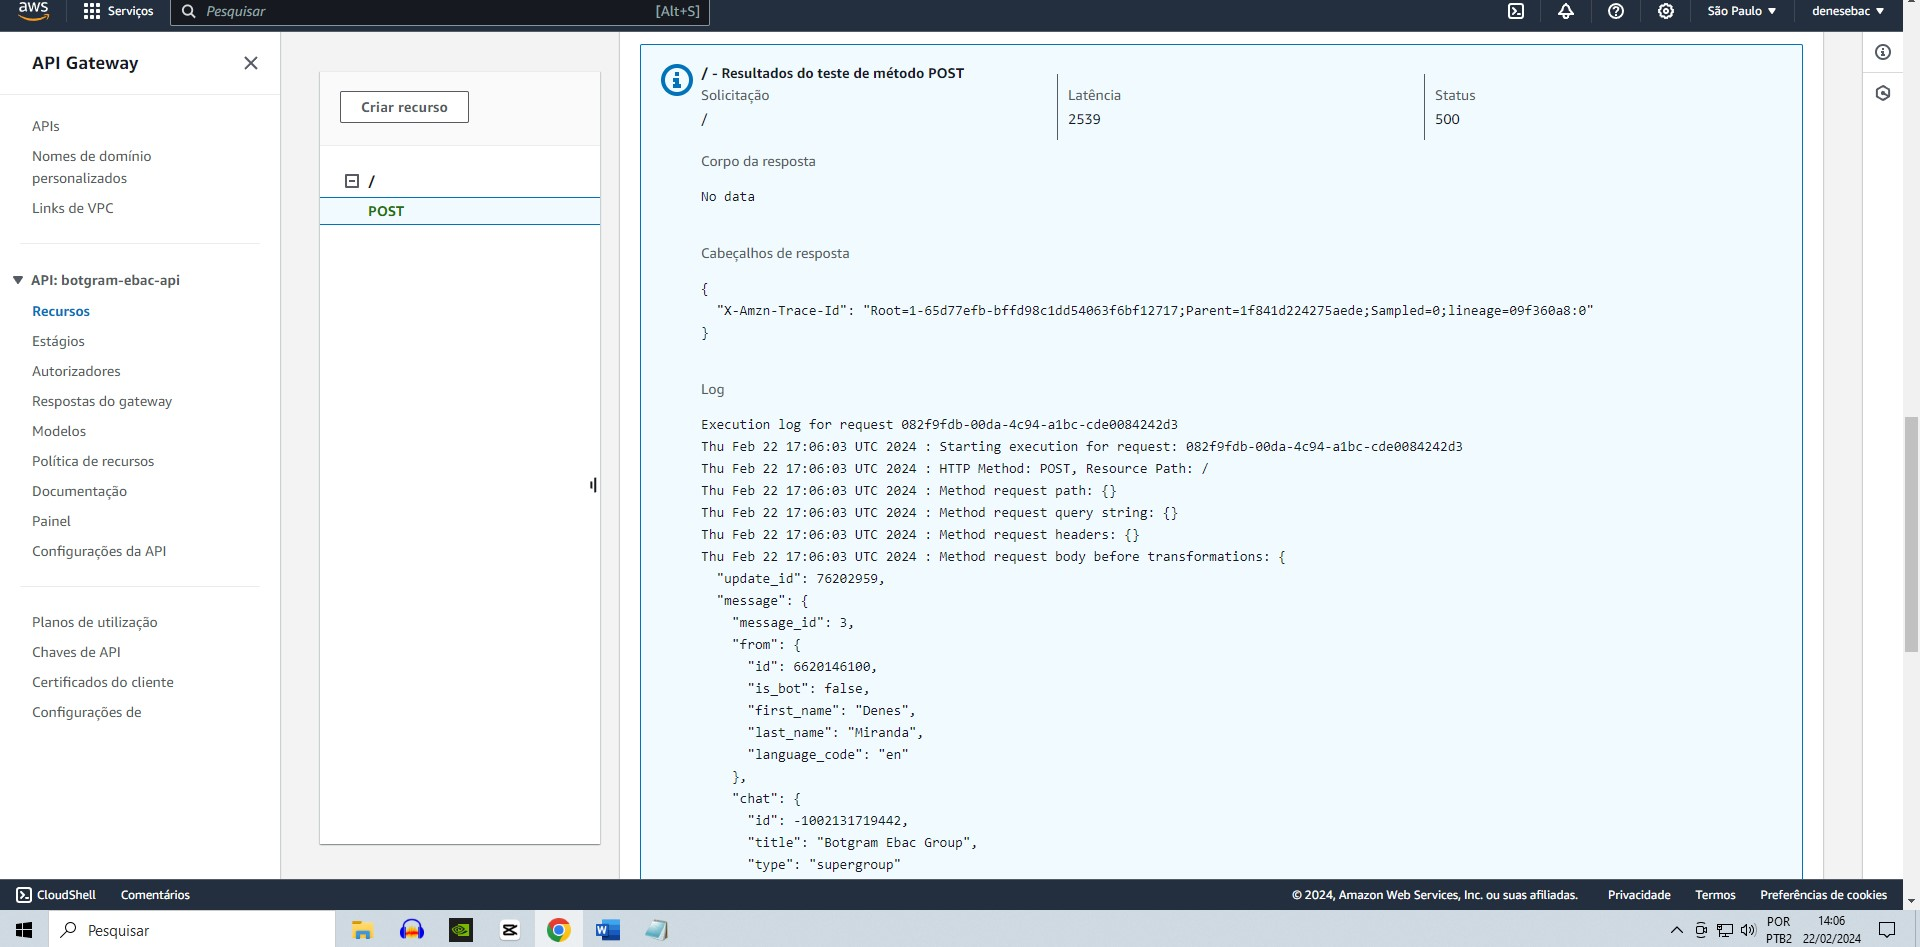

Configuração do *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**. utilize o endereço da API criada no `AWS API Gateway`. Utilize o método `getWebhookInfo` para consultar a integração.

In [84]:
#Ingetar a url do deploy:
from getpass import getpass
aws_api_gateway_url = getpass()

··········


In [85]:
token = getpass()

··········


In [86]:
import json

base_url = f'https://api.telegram.org/bot{token}'

Vamos configurar o webhook para redirecionar as mensagens para a url do AWS API Gateway

In [87]:
import requests
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}


**Resultado:**

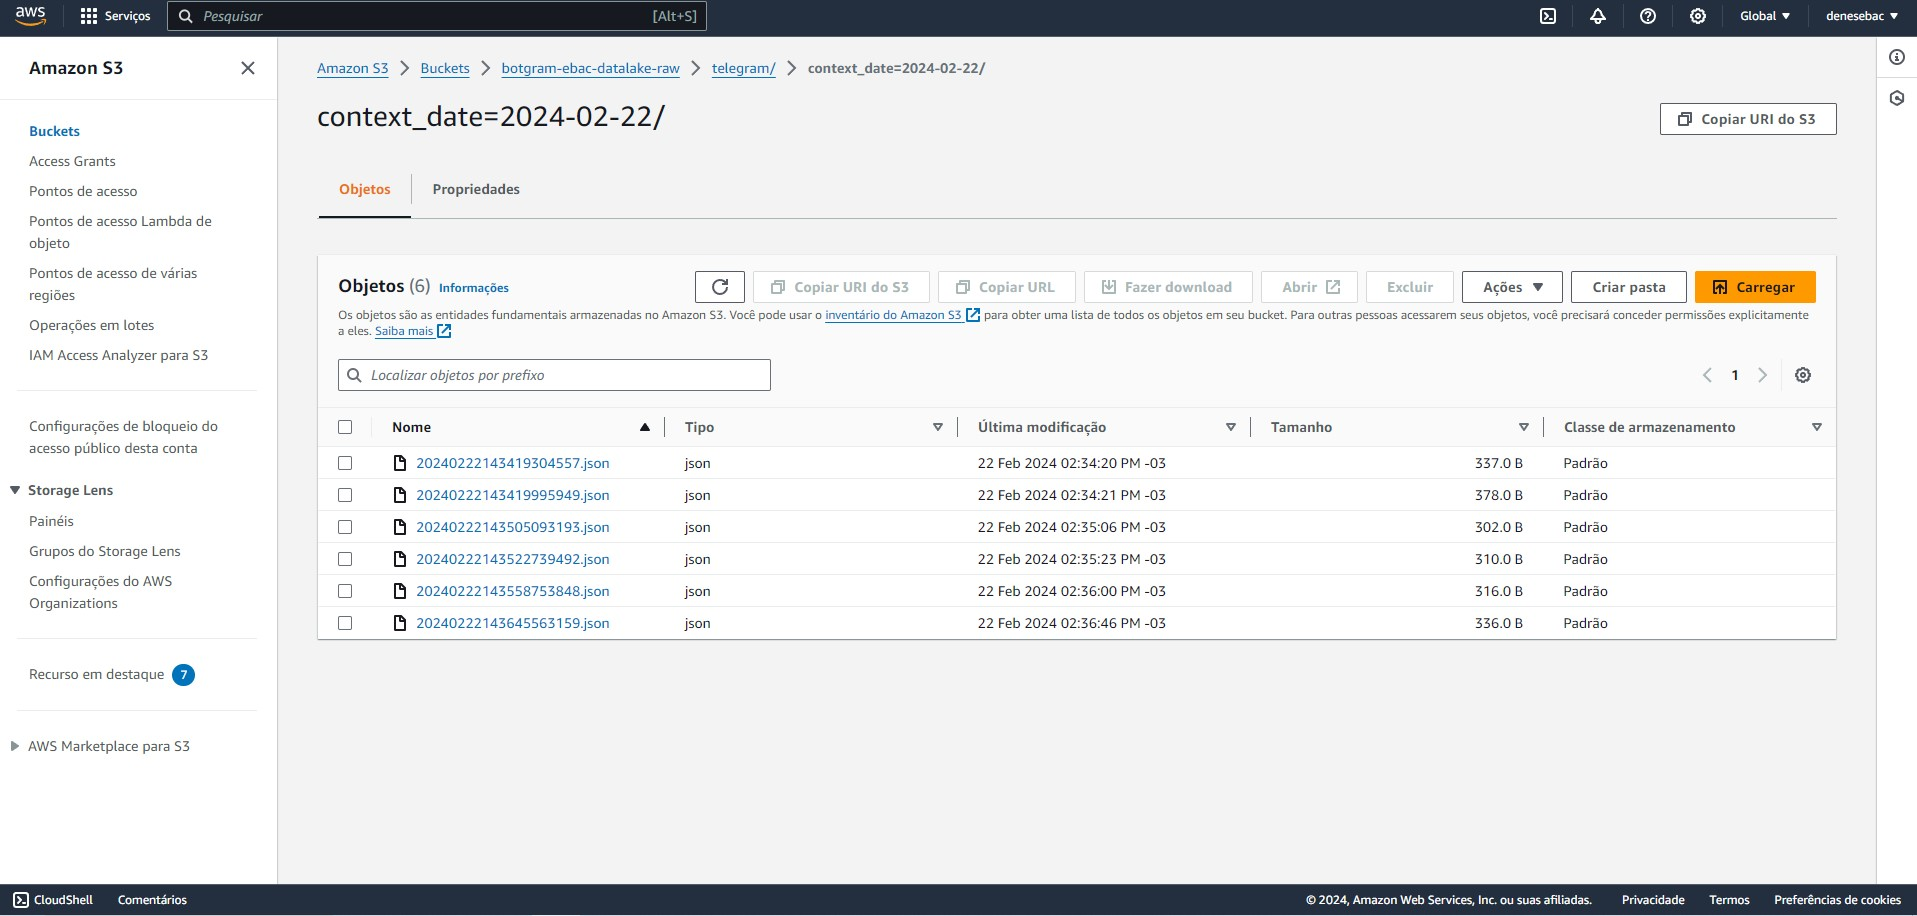

## 6\. ETL

A etapa de extração, transformação e carregamento é a etapa responsável pela manipulação dos dados extraídos na etapa transacional, ou seja, persistidos em camadas cruas (ou raw) de sistemas analíticos. O dado cru armazenado passa por um processo recorrente onde ele é limpo, duplicado e persistido com técnicas de particionamento, orientado a coluna e compressão. Ao final, o dado está pronto para ser analisado por profissionais da área.

Função `AWS Lambda` para processar as mensagens JSON de uma única partição do dia anterior (D-1), armazenadas no *bucket* de dados crus. Salve o resultado em um único arquivo PARQUET, também particionado por dia. Não se esqueça de configurar as variáveis de ambiente, de adicionar as permissão de interação com `AWS S3` no `AWS IAM`, de configurar o *timeout* e de adicionar a *layer* com o código do pacote Python PyArrow.

## 6.1\. Função Lambda criada na AWS (enriched)

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  #date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  date = (datetime.now(tzinfo) - timedelta(days=0)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False


def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

**Arquivos carregados no bucket do S3 (enriched) no formato Parquet**

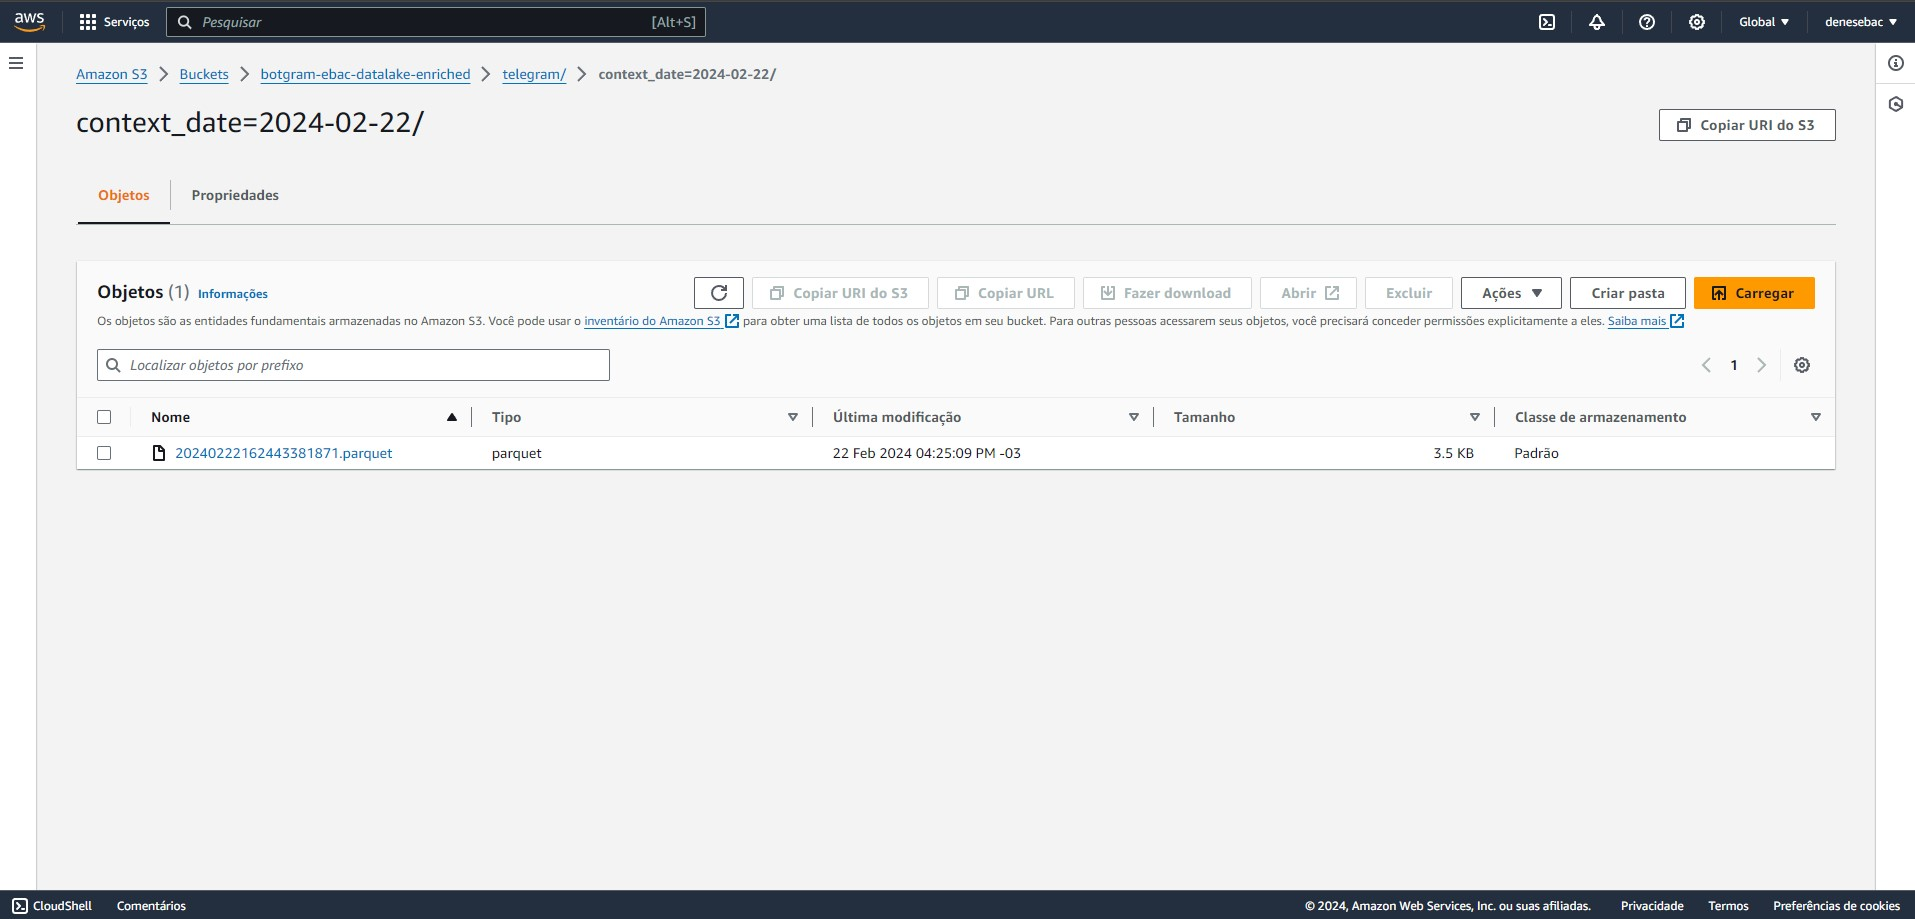

## 6.2\. Leitura dos arquivos

In [89]:
#leitura do arquivo parquet
import pyarrow.parquet as pq

telegram_date = pq.read_table('/content/20240222162443381871.parquet')
telegram_date = telegram_date.to_pandas()
telegram_date.head(n=10)

,message_id,user_id,user_is_bot,user_first_name,chat_id,chat_type,date,text
0,3,6620146100,False,Denes,-1002131719442,supergroup,1708605181,Fazendo teste de captação. Olá Mundo!
1,4,6620146100,False,Denes,-1002131719442,supergroup,1708605565,Esse teste faz parte do teste do exercicio do ...
2,5,6620146100,False,Denes,-1002131719442,supergroup,1708623304,"Olá, pessoal"
3,6,6620146100,False,Denes,-1002131719442,supergroup,1708623322,Vamos testar a integracao
4,7,6620146100,False,Denes,-1002131719442,supergroup,1708623358,entre a API de bots do telegram
5,8,6620146100,False,Denes,-1002131719442,supergroup,1708623405,e etapa de ingestao analistica pelo aws api ga...


## 6.3\. AWS Event Bridge


Na etapa de ETL, o AWS Event Bridge tem a função de ativar diariamente a função de ETL do AWS Lambda, funcionando assim como um scheduler.. Uma vez ao dia, o AWS Event Brigde aciona o AWS Lambda que, por sua vez, processa todas as mensagens geradas no dia anterior (D-1), denormaliza o dado semi-estruturado típico de arquivos JSON, salva o conteúdo processado em um arquivo no formato Apache Parquet, e o armazena no AWS S3 particionado por dia.

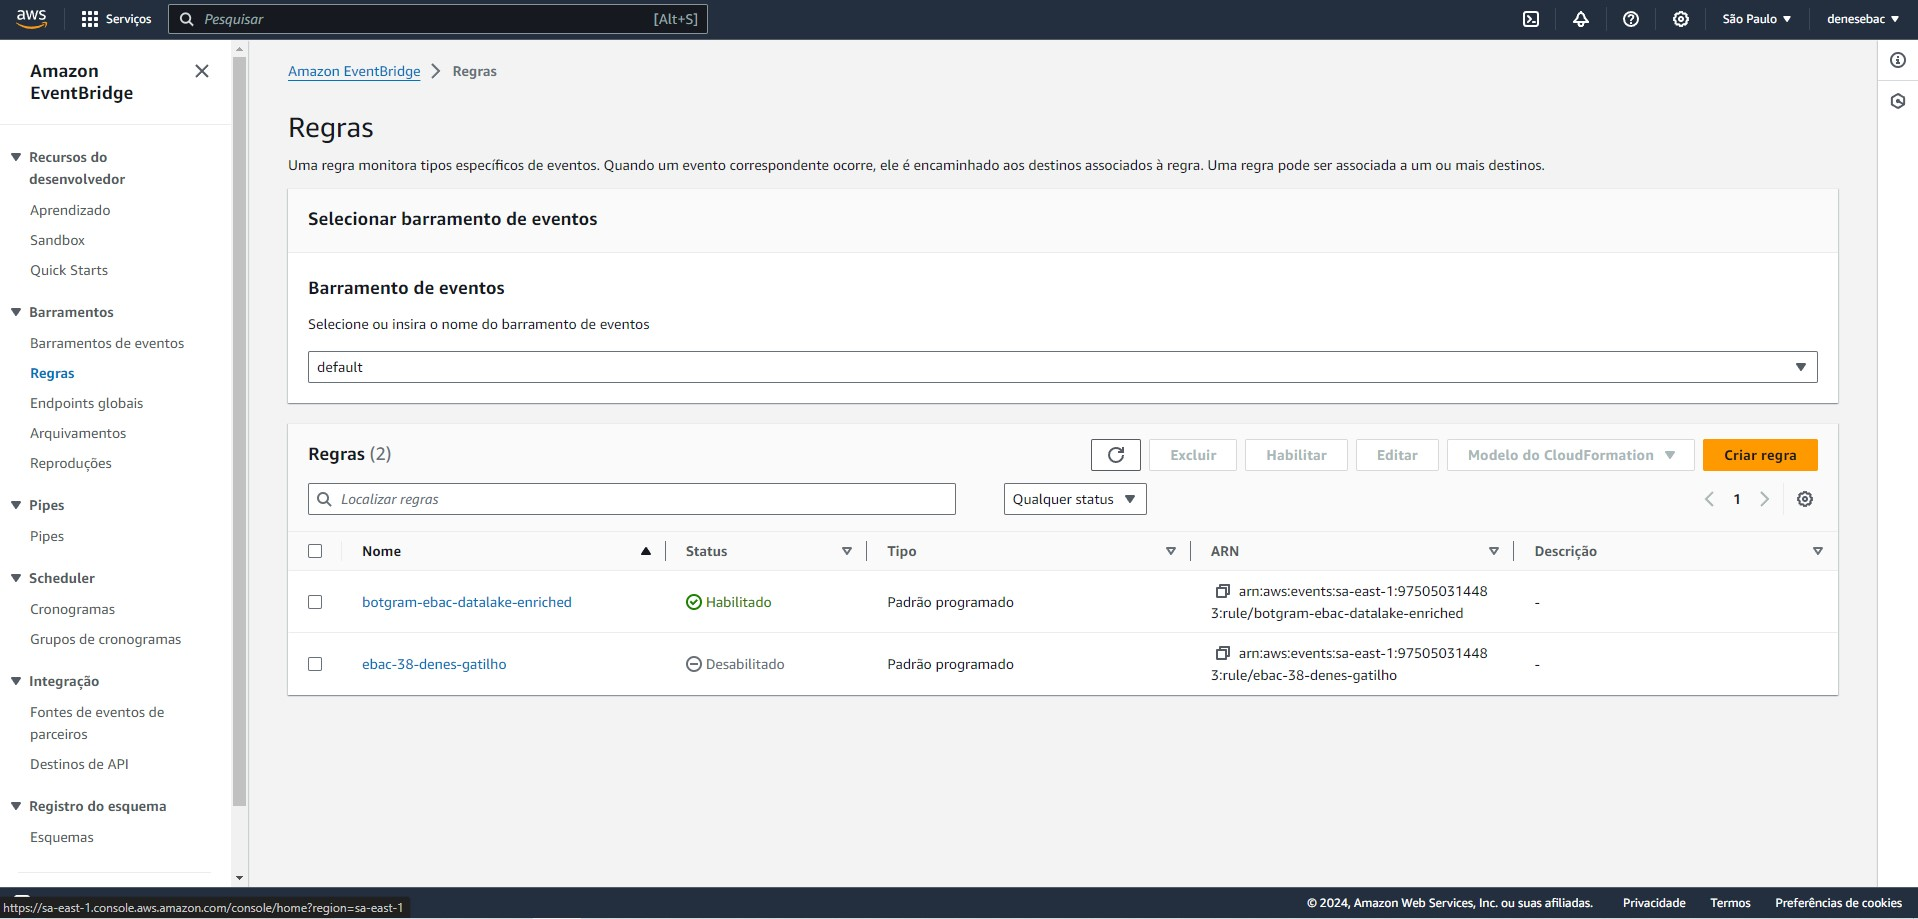

## 7\. Apresentação

A etapa responsável por entregar o dado aos usuários (analistas, cientistas, etc) e sistemas (dashboards, motores de consultas. etc), idealmente através de uma interface de fácil uso, como o SQL, logo, essa é a única etapa que a maioria dos usuários terá acesso. Além disso, é importante que as ferramentas da etapa entreguem dados armazenados em camadas refinadas, pois assim as consultas são mais baratas e os dados mais consistentes.

## 7.1\. AWS Athena

O AWS Athena tem a função de entregar os dados através de uma interface SQL para os usuários do sistema analítico. Para criar a interface, basta criar uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida.

Criando a tabela e pontando para os dados armazenados no bucket enriquecido do `AWS S3`.

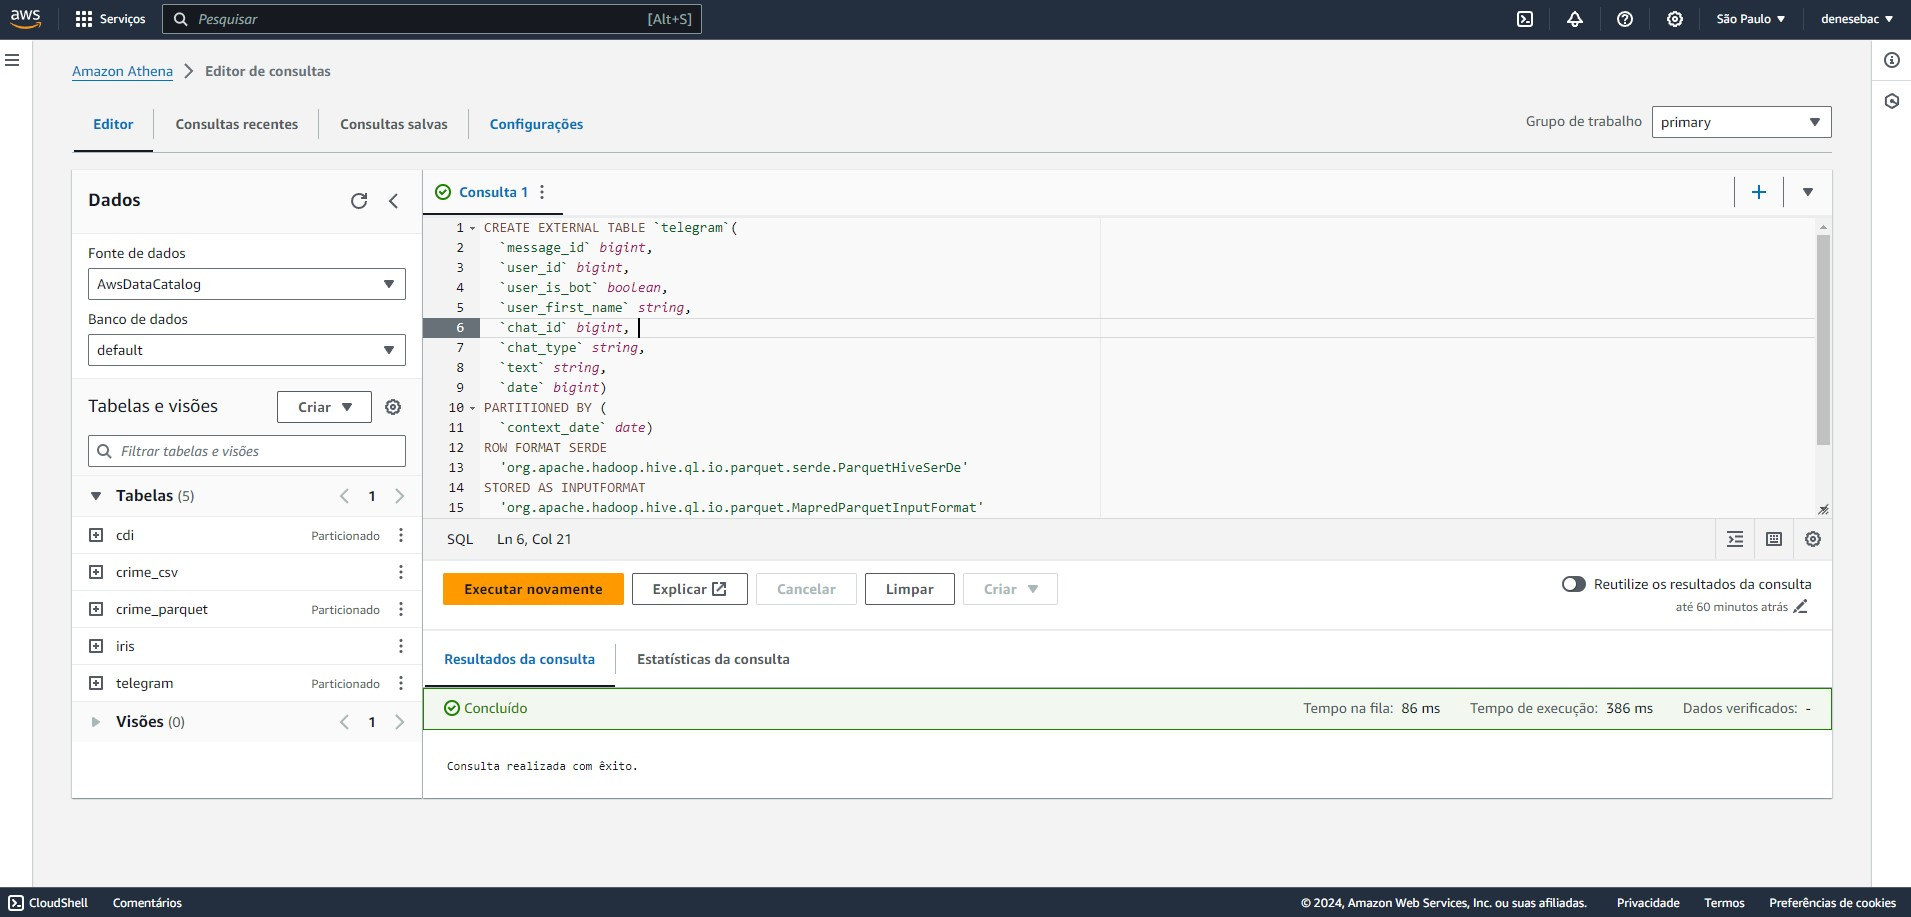

Execultando o comando `MSCK REPAIR TABLE <telegram>` para carregar as partições.

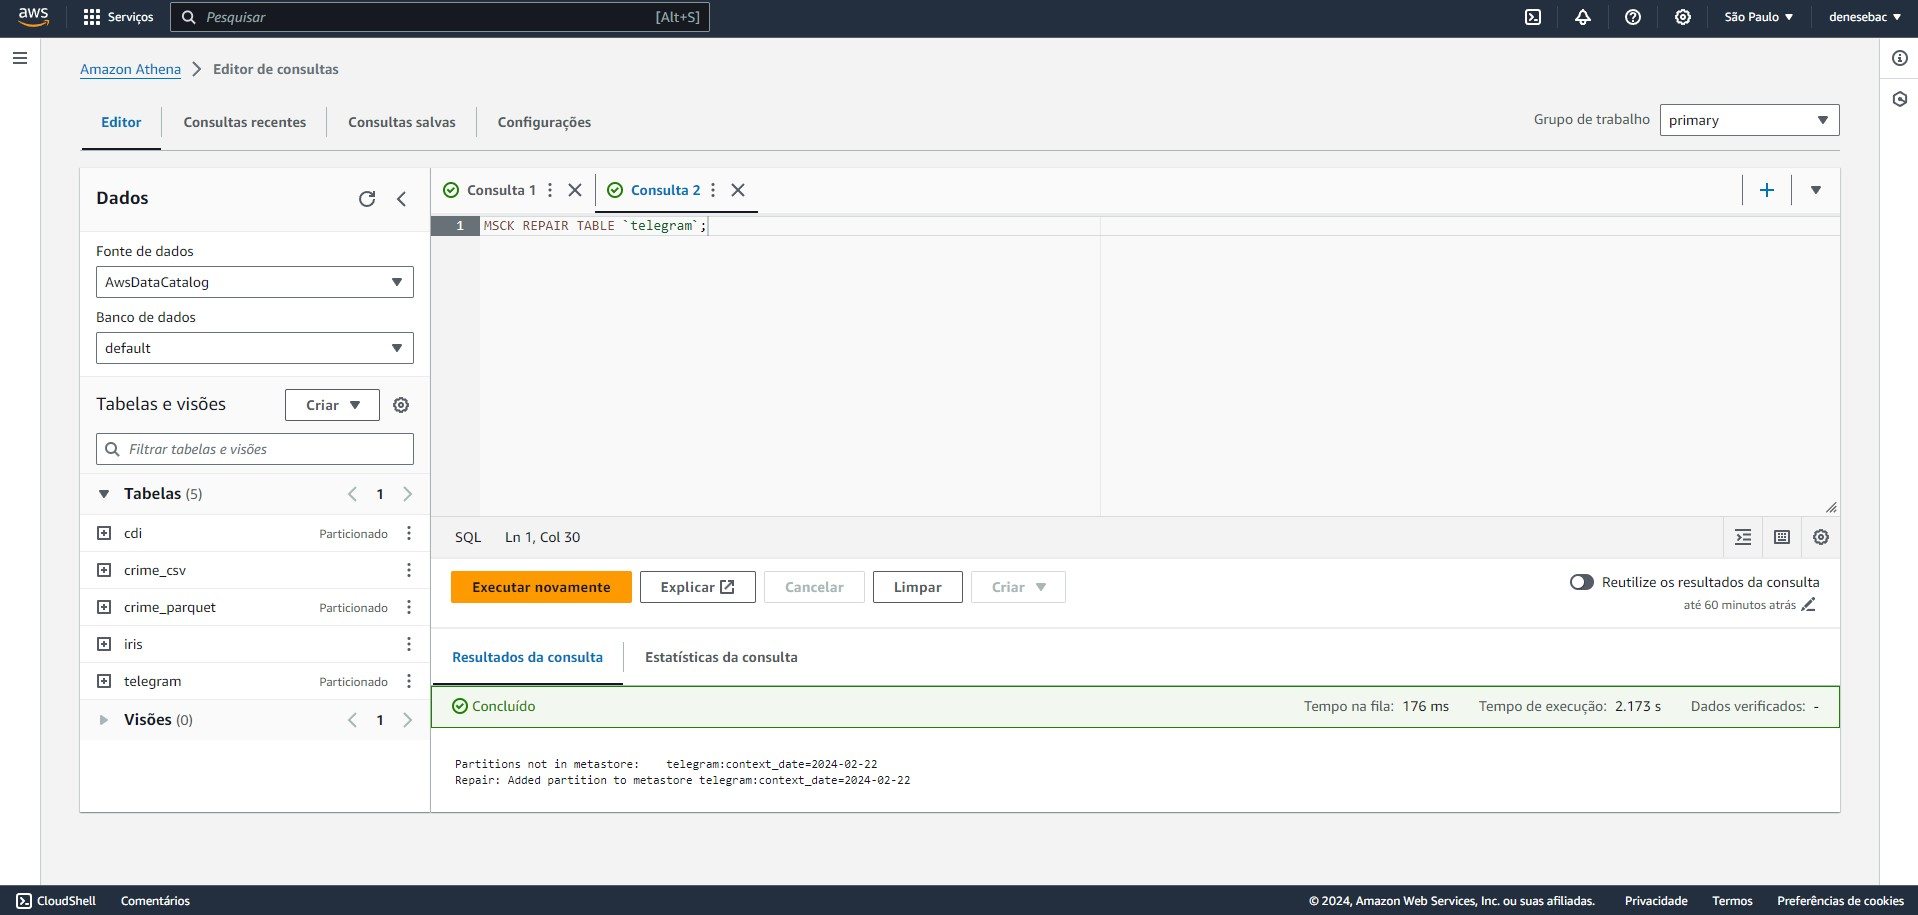

## 7.2\. Explorando os dados

**Query1 - Listando todas as mensagens na tabela (Athena)**

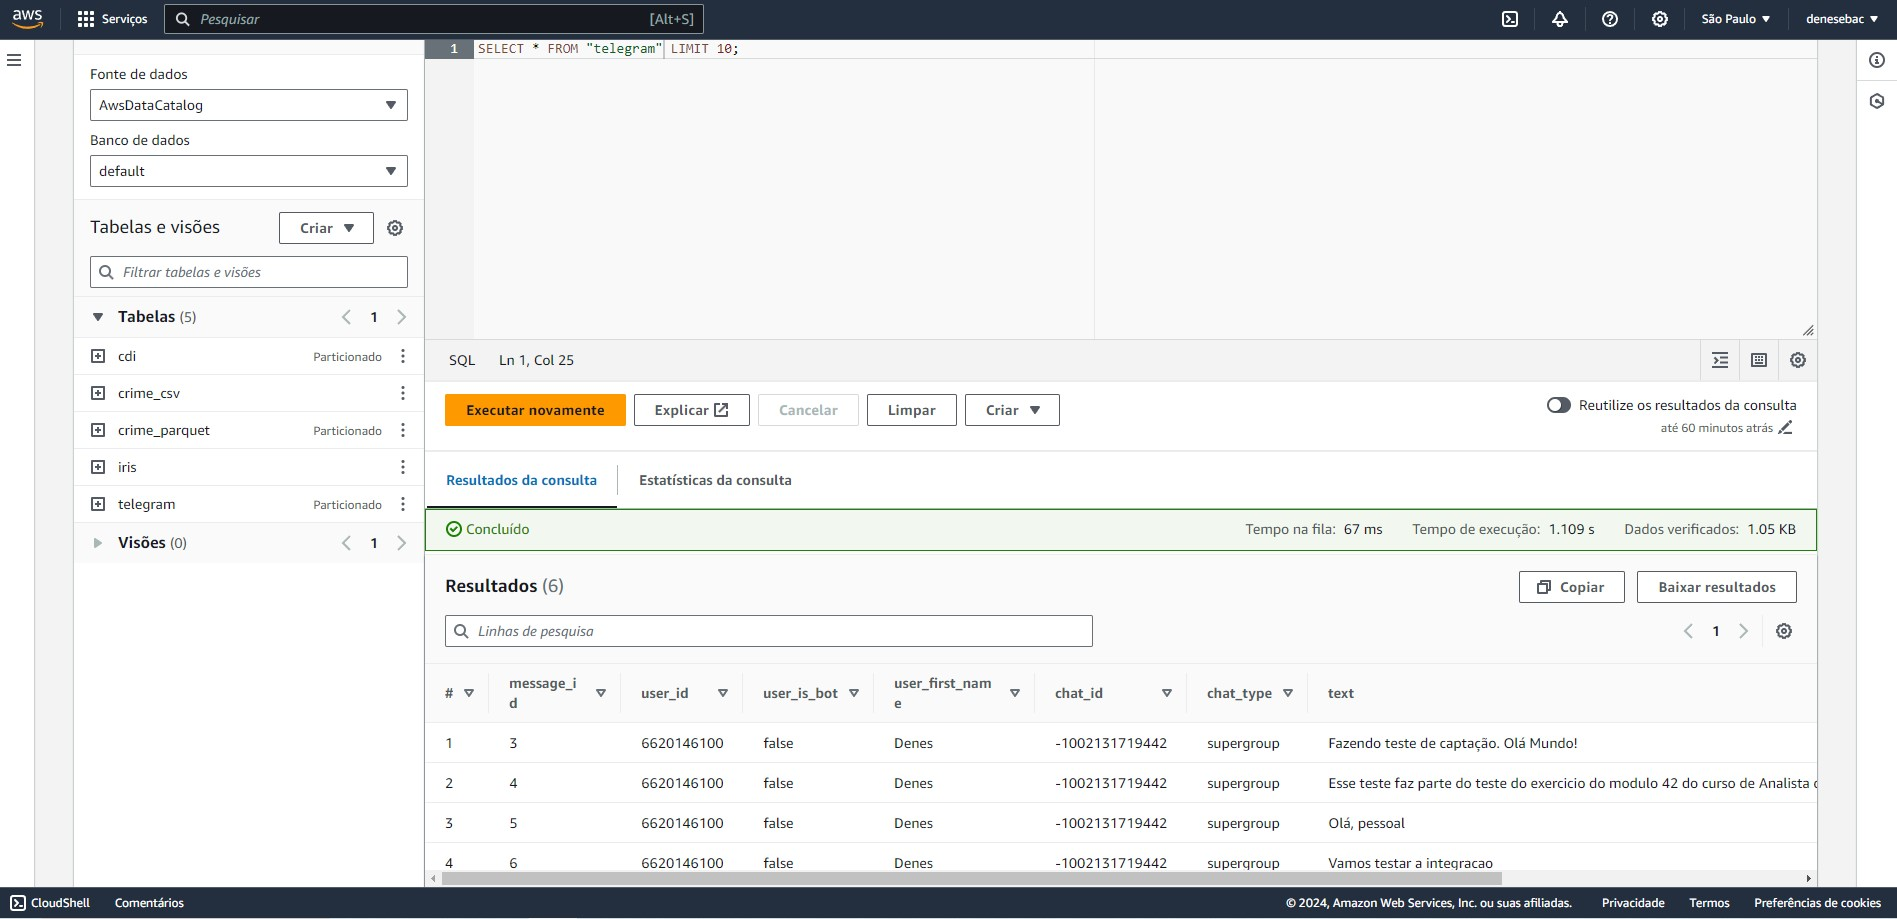

**Query2 - Quantidade de mensagens por dia**

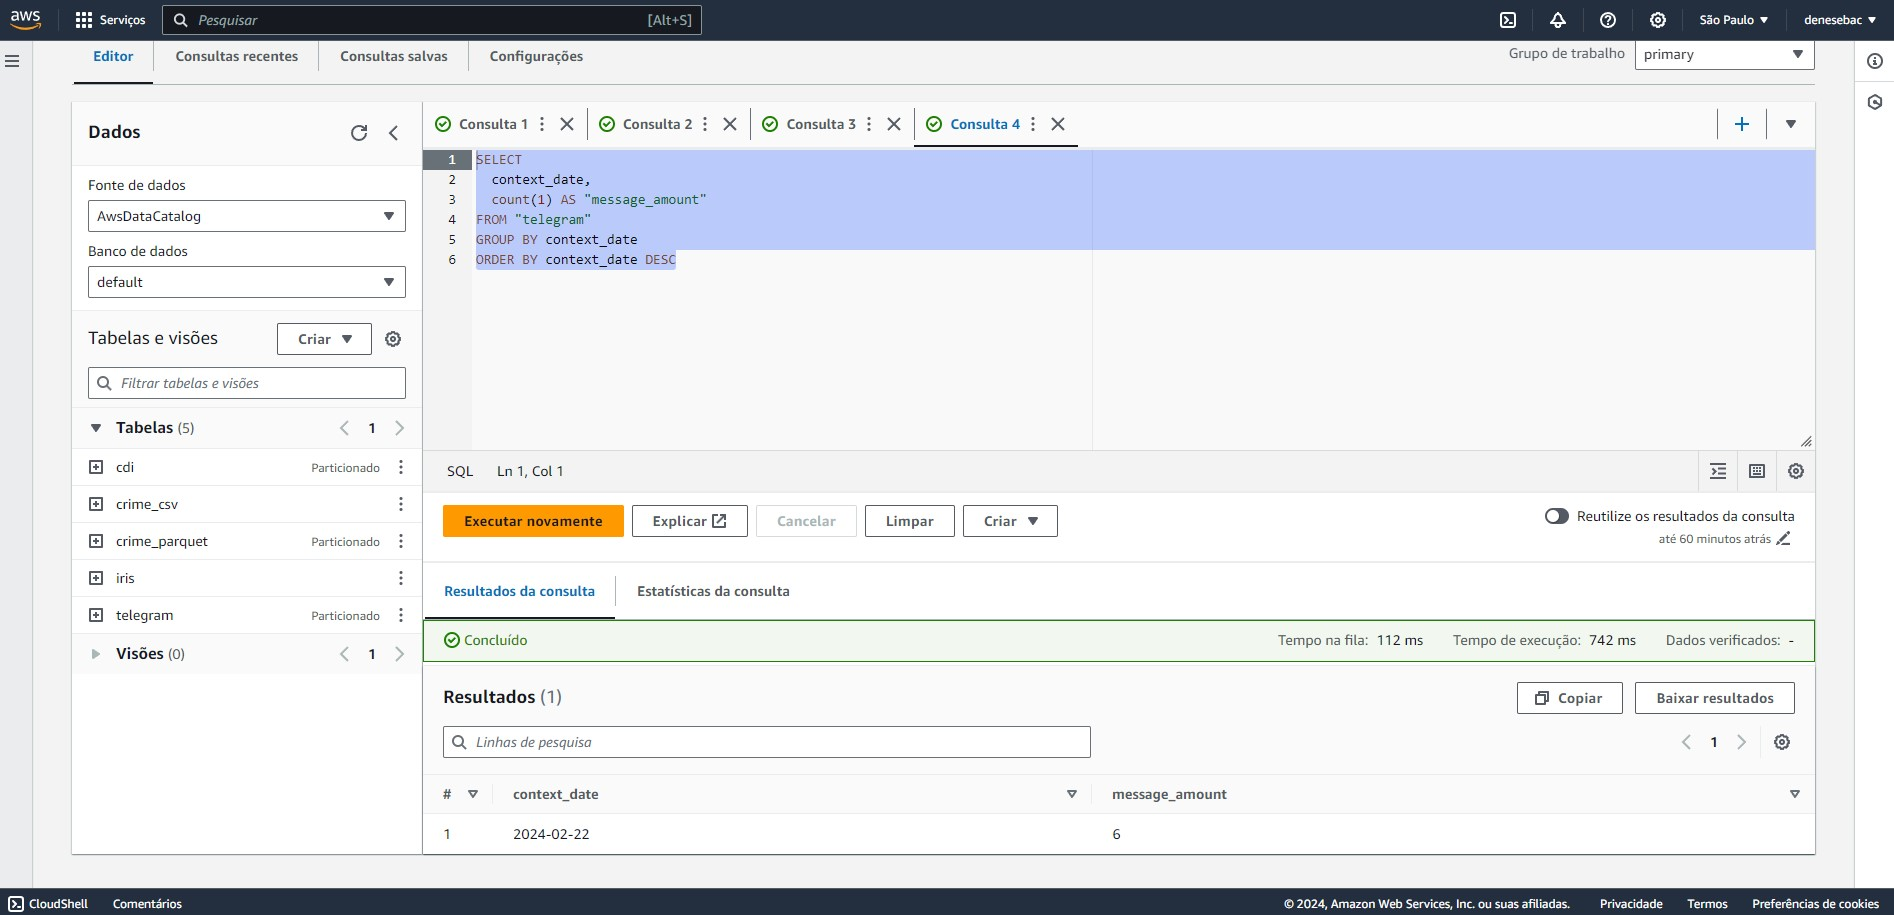

**Query3 - Quantidade de mensagens por usuário por dia**

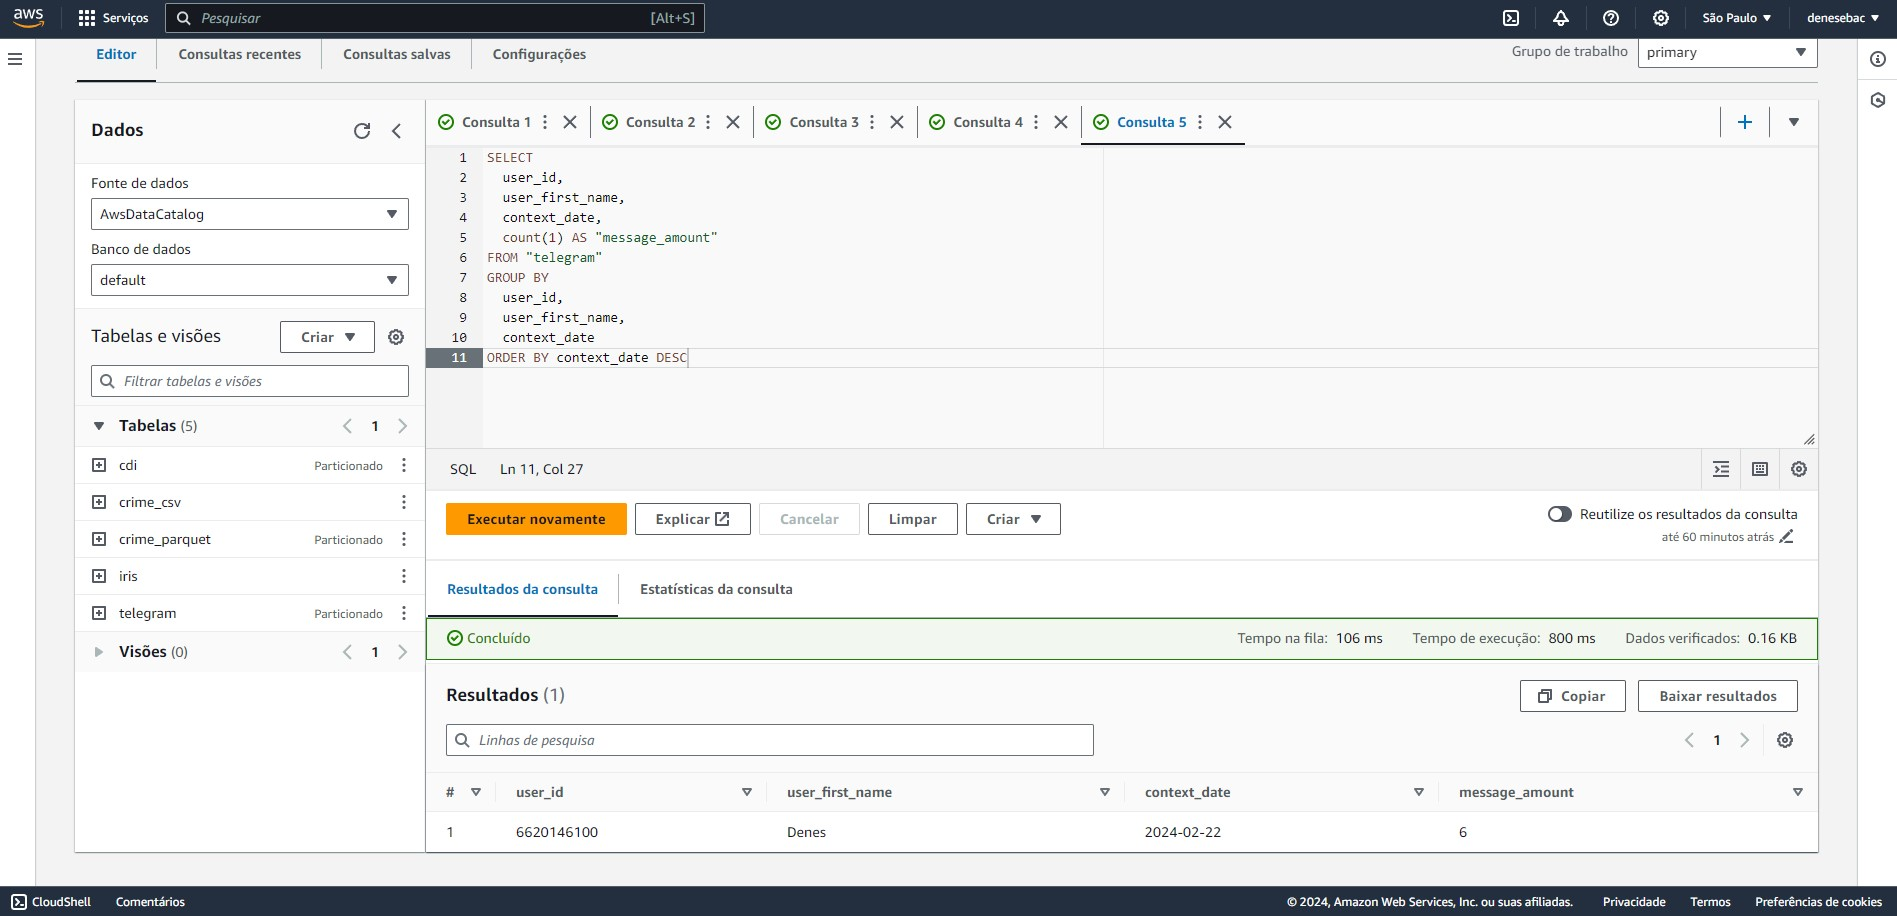

**Query4 - Média do tamanho das mensagens por usuário por dia**

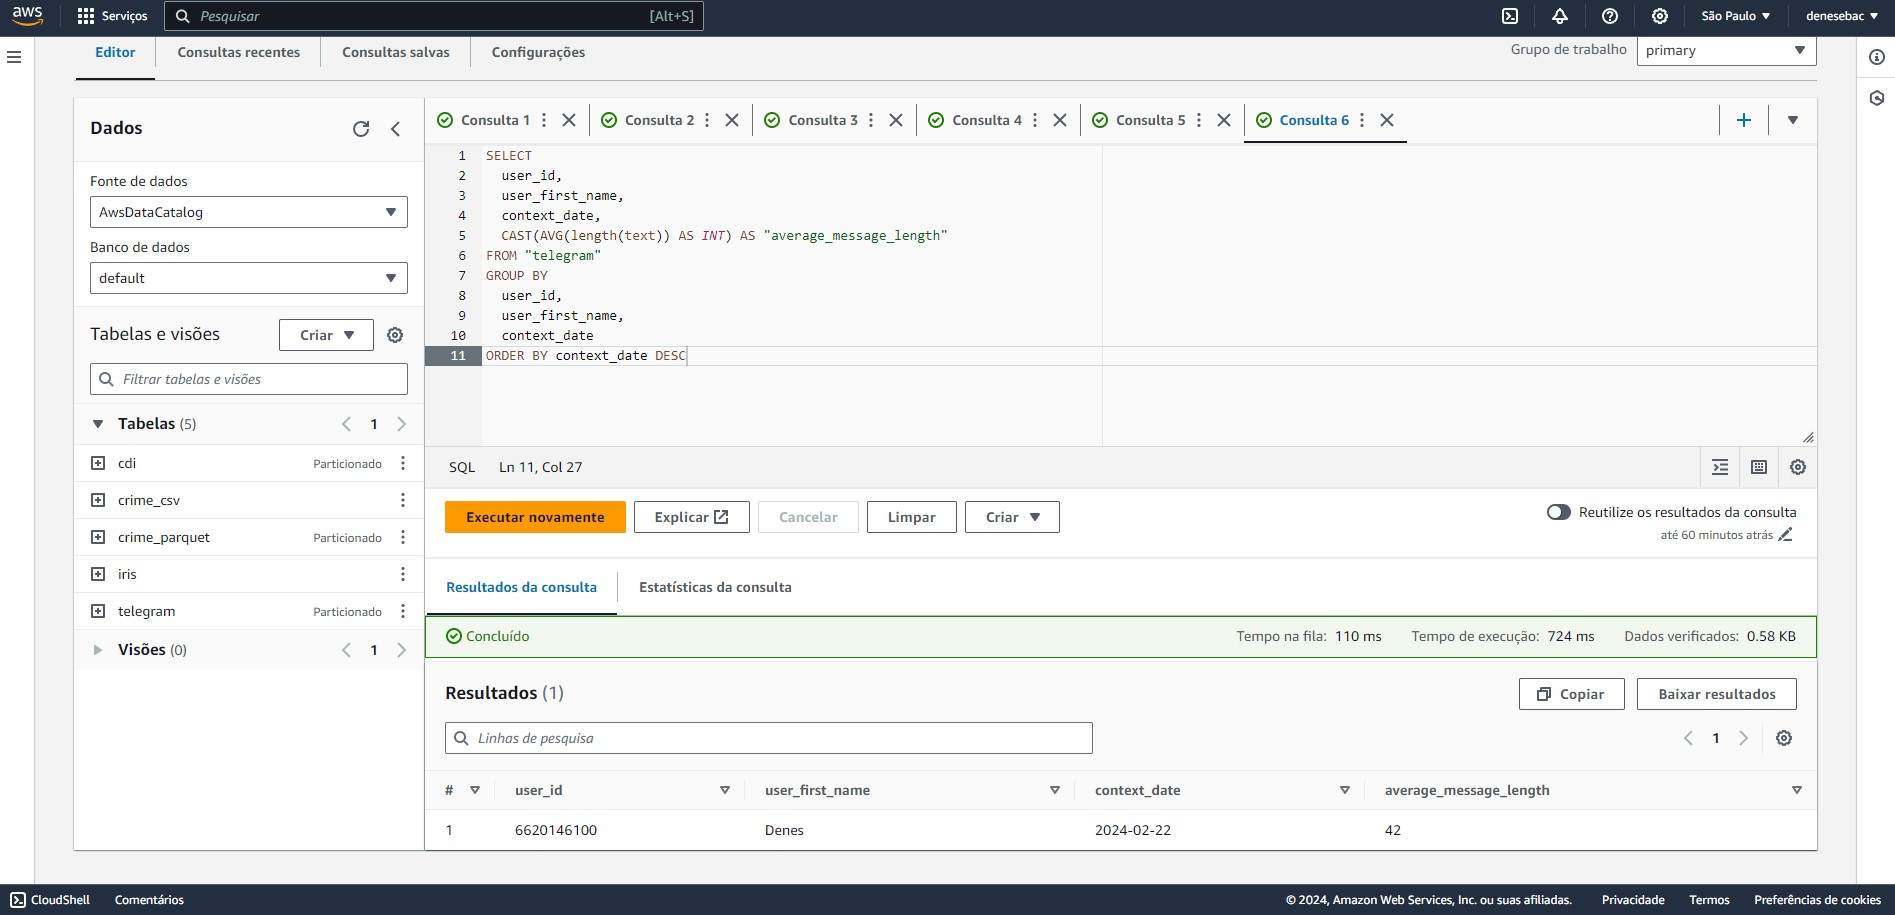

**Query5 - Quantidade de mensagens por hora por dia da semana por número da semana**

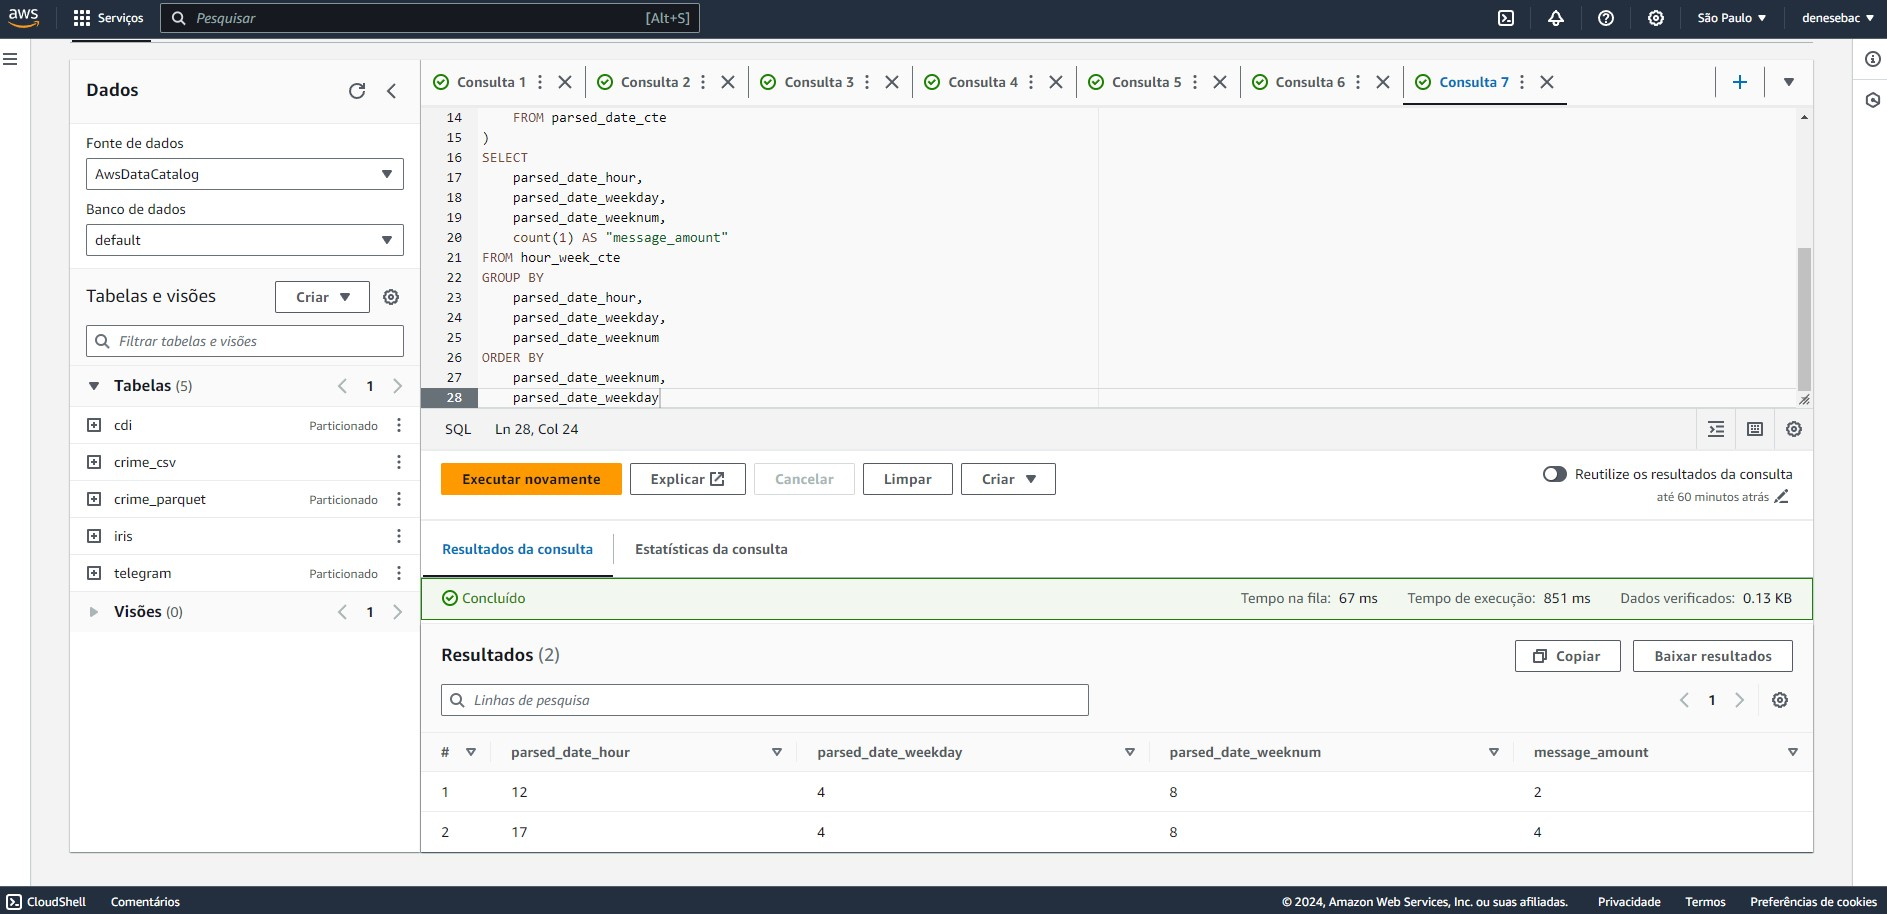

## 8\. Conclusão

Esse trabalho teve como objetivo construir um pipeline de dados para capturar as mensagens enviadas em um grupo específico do Telegram através de um chatbot, processá-las e posteriormente armazená-las em um banco de dados hospedado na nuvem, utilizando as seguintes tecnologias: Python | SQL | AWS(S3, Athena, AWS API, Lambda e Event Bridge)

A integração entre chatbots e análise de dados oferece vantagens significativas às empresas. Enquanto os chatbots melhoram a interação com os clientes, a análise dos dados resultantes fornece insights cruciais para decisões estratégicas. Essa combinação não apenas aprimora a experiência do cliente, mas também otimiza processos internos e impulsiona o crescimento empresarial em todos os setores. Portanto, a criação de uma Pipeline de Dados integrada ao Bot do Telegram apresentou ser uma ferramenta altamente valiosa e repleta de oportunidades.